In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load Data

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
train.shape

(7613, 5)

In [15]:
test.shape

(3263, 4)

In [16]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# EDA

In [17]:
kw = train.keyword.value_counts().head(10).reset_index()
kw.columns=['keyword','frequency']

In [18]:
loc = train.location.value_counts().head(10).reset_index()
loc.columns=['location','frequency']

In [19]:
def plot_frequency(data,title):
    plt.figure(figsize=(10,6))
    plt.title('Most Frequent '+title,fontsize=20,fontweight='bold', pad=20)
    sns.barplot(x=title,y='frequency',data=data,palette='Set2')

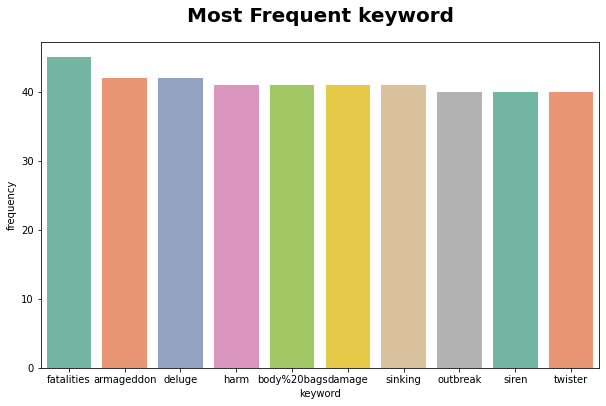

In [20]:
plot_frequency(kw,'keyword')

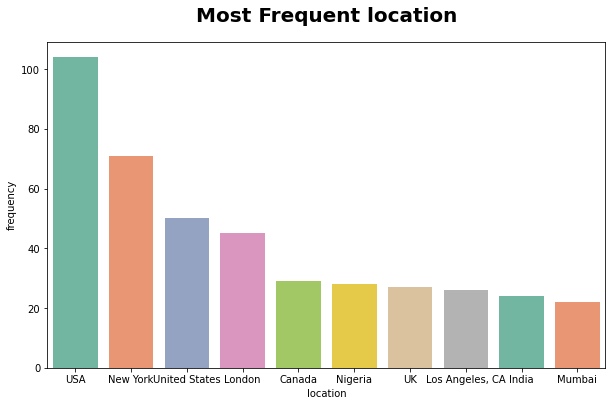

In [21]:
plot_frequency(loc,'location')

In [22]:
train.keyword.nunique()

221

In [23]:
imp = train.groupby('keyword').sum().reset_index().sort_values('target',ascending=False).head(20)

In [24]:
wdlist = list(imp.keyword)

In [25]:
def getwordcloud(ls):
  word = ' '
  for i in range(len(ls)):
    word = word + ls[i] + ' '
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(word) 
  plt.figure(figsize = (10, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 

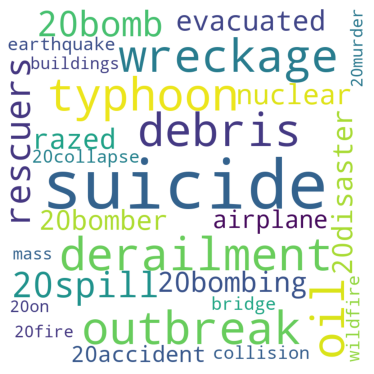

In [26]:
getwordcloud(wdlist)

# Data Processing
## Word2Vec - Word Embedding

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hiefu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiefu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

The function below is to preprocess the tweets into word list in order to transform to numerical vectors.

In [29]:
def text_processing(data):
    tweets = list()
    lines = data.text.values.tolist()
    """
    create a word list：
    1. convert all the words in the tweets to lower case
    2. remove punctuation from each word
    3. remove remaining tokens that are not alphabetic
    4. filter out stop words
    """
    for line in lines:
        tokens = word_tokenize(line)
        
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        
        # remove punctuation from each word
        table = str.maketrans('','',string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        
        # filter out stop words
        my_stopwords = ['http','https','amp','nt']
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words and word not in my_stopwords]
        
        tweets.append(words)
    return tweets

In [30]:
train_text = text_processing(train)

In [31]:
test_text = text_processing(test)

In [32]:
len(train_text)

7613

In [33]:
len(test_text)

3263

## Load Pre_trained Word2vec model

In [34]:
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 3 million embeddings, each lengh 300
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300") # load 300-dimension word vectors
    vocab = list(wv_from_bin.vocab.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [37]:
wv_from_bin = load_word2vec()

[--------------------------------------------------] 1.4% 24.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 4.0% 66.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.0% 100.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 8.0% 133.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.9% 164.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.1% 201.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.8% 246.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.8% 278.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.5% 323.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.5% 356.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.5% 391.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.6% 426.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.6% 458.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.6% 492.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.1% 550.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.9% 580.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.8% 628.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.8% 662.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.6% 692.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.6% 925.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.4% 954.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.3% 986.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.2% 1018.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.1% 1048.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.3% 1500.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 92.0% 1529.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.8% 1559.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.5% 1588.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.4% 1619.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.4% 1652.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded
Loaded vocab size 3000000


## Use Pre-trained Embedding by Tokenizer API in keras

In [38]:
# Import library
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

Build the embedding layer

In [39]:
def get_pad(data):
  # vectorize the text
  tokenizer_obj = Tokenizer()
  tokenizer_obj.fit_on_texts(data)
  sequences = tokenizer_obj.texts_to_sequences(data)

  # pad sequences
  word_index = tokenizer_obj.word_index
  print('Found %s unique tokens' % len(word_index))

  # find the max lengh of each sequence
  find_max=[]
  for i in range(len(sequences)):
      find_max.append(len(sequences[i]))
  max_length = max(find_max)

  text_pad = pad_sequences(sequences,maxlen=max_length)
  print('Shape of text tensor:',text_pad.shape)
  return text_pad

In [40]:
def get_wordindex(data):
  # vectorize the text
  tokenizer_obj = Tokenizer()
  tokenizer_obj.fit_on_texts(data)
  word_index = tokenizer_obj.word_index
  return word_index

In [41]:
def get_maxlength(data):
  # vectorize the text
  tokenizer_obj = Tokenizer()
  tokenizer_obj.fit_on_texts(data)
  sequences = tokenizer_obj.texts_to_sequences(data)

  # find the max lengh of each sequence
  find_max=[]
  for i in range(len(sequences)):
      find_max.append(len(sequences[i]))
  max_length = max(find_max)

In [42]:
def get_embedding(word_index):
    
  # create a matrix for the vocabulary of our training set, the row represents each vocabulary,
  # the column represents each dimention we created for this vocabulary
  embedding = np.zeros((len(word_index)+1, 300))
  for word in word_index.keys():
      if word in wv_from_bin.vocab.keys():
          embedding[word_index[word], :] = np.array(wv_from_bin.word_vec(word))
      else:
          embedding[word_index[word], :] = np.random.randn(300)
  return embedding

In [43]:
train_pad = get_pad(train_text)

Found 16641 unique tokens
Shape of text tensor: (7613, 23)


In [44]:
word_index = get_wordindex(train_text)
embedding = get_embedding(word_index)
max_length = get_maxlength(train_text)

# Model

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM, GRU,Bidirectional, BatchNormalization, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

Using TensorFlow backend.


In [46]:
embedding_dim = 300
Embedding_layer = Embedding((len(word_index)+1),embedding_dim,
                    embeddings_initializer=Constant(embedding),
                    input_length=max_length,
                    trainable = False)

# Model - GRU

In [47]:
model=Sequential()
model.add(Embedding_layer)
model.add(Bidirectional(GRU(32,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(GRU(32,dropout=0.2,recurrent_dropout=0.1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         4992600   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          63936     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                18624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 5,075,225
Trainable params: 82,625
Non-trainable params: 4,992,600
_________________________________________________________________


In [62]:
hist=model.fit(train_pad,train.target.values,batch_size=128,epochs=15, validation_split = 0.2,verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
 - 2s - loss: 0.2323 - accuracy: 0.9085 - val_loss: 0.5722 - val_accuracy: 0.7538
Epoch 2/15
 - 3s - loss: 0.2325 - accuracy: 0.9103 - val_loss: 0.5788 - val_accuracy: 0.7433
Epoch 3/15
 - 3s - loss: 0.2262 - accuracy: 0.9128 - val_loss: 0.5652 - val_accuracy: 0.7544
Epoch 4/15
 - 3s - loss: 0.2083 - accuracy: 0.9207 - val_loss: 0.5744 - val_accuracy: 0.7603
Epoch 5/15
 - 3s - loss: 0.2087 - accuracy: 0.9181 - val_loss: 0.5646 - val_accuracy: 0.7584
Epoch 6/15
 - 3s - loss: 0.1993 - accuracy: 0.9225 - val_loss: 0.5845 - val_accuracy: 0.7551
Epoch 7/15
 - 3s - loss: 0.1977 - accuracy: 0.9235 - val_loss: 0.5822 - val_accuracy: 0.7472
Epoch 8/15
 - 3s - loss: 0.1941 - accuracy: 0.9213 - val_loss: 0.5911 - val_accuracy: 0.7525
Epoch 9/15
 - 3s - loss: 0.1926 - accuracy: 0.9253 - val_loss: 0.5891 - val_accuracy: 0.7623
Epoch 10/15
 - 3s - loss: 0.1828 - accuracy: 0.9266 - val_loss: 0.6374 - val_accuracy: 0.7367
Epoch 11/15
 - 3s - l

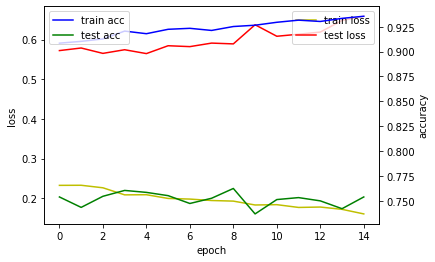

In [64]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## GRU Model with additional layer

In [67]:
# Add aditional layer
model1=Sequential()
model1.add(Embedding_layer)
model1.add(Bidirectional(GRU(32,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model1.add(Bidirectional(GRU(32,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model1.add(Bidirectional(GRU(32,dropout=0.2,recurrent_dropout=0.1)))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         4992600   
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 64)          63936     
_________________________________________________________________
bidirectional_9 (Bidirection (None, None, 64)          18624     
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                18624     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 5,093,849
Trainable params: 101,249
Non-trainable params: 4,992,600
_________________________________________________________________


In [69]:
hist=model1.fit(train_pad,train.target.values,batch_size=128,epochs=15, validation_split = 0.2,verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
 - 8s - loss: 0.6075 - accuracy: 0.6683 - val_loss: 0.4809 - val_accuracy: 0.7695
Epoch 2/15
 - 4s - loss: 0.4732 - accuracy: 0.7864 - val_loss: 0.4658 - val_accuracy: 0.7774
Epoch 3/15
 - 4s - loss: 0.4477 - accuracy: 0.7995 - val_loss: 0.4622 - val_accuracy: 0.7840
Epoch 4/15
 - 4s - loss: 0.4214 - accuracy: 0.8140 - val_loss: 0.4624 - val_accuracy: 0.7873
Epoch 5/15
 - 4s - loss: 0.4055 - accuracy: 0.8263 - val_loss: 0.4801 - val_accuracy: 0.7682
Epoch 6/15
 - 4s - loss: 0.3860 - accuracy: 0.8369 - val_loss: 0.4829 - val_accuracy: 0.7597
Epoch 7/15
 - 4s - loss: 0.3666 - accuracy: 0.8463 - val_loss: 0.4790 - val_accuracy: 0.7702
Epoch 8/15
 - 4s - loss: 0.3447 - accuracy: 0.8606 - val_loss: 0.4879 - val_accuracy: 0.7623
Epoch 9/15
 - 4s - loss: 0.3265 - accuracy: 0.8654 - val_loss: 0.4783 - val_accuracy: 0.7715
Epoch 10/15
 - 4s - loss: 0.3176 - accuracy: 0.8683 - val_loss: 0.5005 - val_accuracy: 0.7649
Epoch 11/15
 - 4s - l

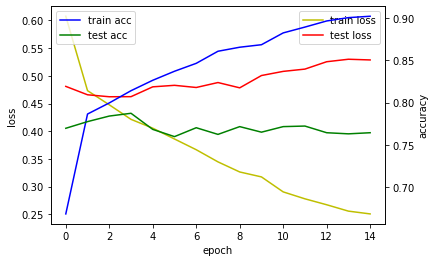

In [70]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## GRU Model with additional layer and 64 neurons

In [71]:
# Add aditional layer & neurons
model1_1=Sequential()
model1_1.add(Embedding_layer)
model1_1.add(Bidirectional(GRU(64,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model1_1.add(Bidirectional(GRU(64,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model1_1.add(Bidirectional(GRU(64,dropout=0.2,recurrent_dropout=0.1)))
model1_1.add(Dense(1,activation='sigmoid'))
model1_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
model1_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         4992600   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, None, 128)         140160    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 128)         74112     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)               74112     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 5,281,113
Trainable params: 288,513
Non-trainable params: 4,992,600
_________________________________________________________________


In [73]:
hist=model1_1.fit(train_pad,train.target.values,batch_size=128,epochs=15, validation_split = 0.2,verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
 - 9s - loss: 0.5639 - accuracy: 0.7031 - val_loss: 0.4927 - val_accuracy: 0.7853
Epoch 2/15
 - 6s - loss: 0.4555 - accuracy: 0.7979 - val_loss: 0.4626 - val_accuracy: 0.7873
Epoch 3/15
 - 6s - loss: 0.4221 - accuracy: 0.8159 - val_loss: 0.4648 - val_accuracy: 0.7892
Epoch 4/15
 - 6s - loss: 0.3986 - accuracy: 0.8276 - val_loss: 0.4804 - val_accuracy: 0.7748
Epoch 5/15
 - 6s - loss: 0.3660 - accuracy: 0.8452 - val_loss: 0.4955 - val_accuracy: 0.7695
Epoch 6/15
 - 6s - loss: 0.3466 - accuracy: 0.8539 - val_loss: 0.5012 - val_accuracy: 0.7656
Epoch 7/15
 - 6s - loss: 0.3184 - accuracy: 0.8700 - val_loss: 0.5070 - val_accuracy: 0.7656
Epoch 8/15
 - 6s - loss: 0.2931 - accuracy: 0.8785 - val_loss: 0.5445 - val_accuracy: 0.7630
Epoch 9/15
 - 6s - loss: 0.2721 - accuracy: 0.8893 - val_loss: 0.5397 - val_accuracy: 0.7656
Epoch 10/15
 - 6s - loss: 0.2550 - accuracy: 0.8977 - val_loss: 0.5289 - val_accuracy: 0.7630
Epoch 11/15
 - 6s - l

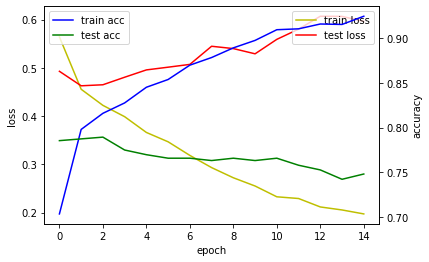

In [74]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## GRU Model with additional layer and 128 neurons

In [75]:
# Add aditional layer & neurons
model1_2=Sequential()
model1_2.add(Embedding_layer)
model1_2.add(Bidirectional(GRU(128,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model1_2.add(Bidirectional(GRU(128,dropout=0.2,recurrent_dropout=0.1,return_sequences=True)))
model1_2.add(Bidirectional(GRU(128,dropout=0.2,recurrent_dropout=0.1)))
model1_2.add(Dense(1,activation='sigmoid'))
model1_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
model1_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         4992600   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, None, 256)         329472    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, None, 256)         295680    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 256)               295680    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 5,913,689
Trainable params: 921,089
Non-trainable params: 4,992,600
_________________________________________________________________


In [77]:
hist=model1_2.fit(train_pad,train.target.values,batch_size=128,epochs=15, validation_split = 0.2,verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
 - 16s - loss: 0.5447 - accuracy: 0.7215 - val_loss: 0.4866 - val_accuracy: 0.7814
Epoch 2/15
 - 12s - loss: 0.4444 - accuracy: 0.7995 - val_loss: 0.4767 - val_accuracy: 0.7846
Epoch 3/15
 - 12s - loss: 0.4104 - accuracy: 0.8187 - val_loss: 0.4726 - val_accuracy: 0.7722
Epoch 4/15
 - 12s - loss: 0.3740 - accuracy: 0.8407 - val_loss: 0.4948 - val_accuracy: 0.7656
Epoch 5/15
 - 12s - loss: 0.3373 - accuracy: 0.8603 - val_loss: 0.5109 - val_accuracy: 0.7669
Epoch 6/15
 - 12s - loss: 0.3197 - accuracy: 0.8685 - val_loss: 0.5267 - val_accuracy: 0.7649
Epoch 7/15
 - 12s - loss: 0.2708 - accuracy: 0.8929 - val_loss: 0.5407 - val_accuracy: 0.7617
Epoch 8/15
 - 12s - loss: 0.2628 - accuracy: 0.8933 - val_loss: 0.5439 - val_accuracy: 0.7538
Epoch 9/15
 - 12s - loss: 0.2375 - accuracy: 0.9077 - val_loss: 0.5761 - val_accuracy: 0.7544
Epoch 10/15
 - 12s - loss: 0.2258 - accuracy: 0.9113 - val_loss: 0.5546 - val_accuracy: 0.7603
Epoch 11/15

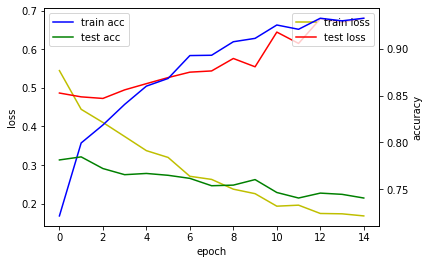

In [78]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# Model - LSTM

In [50]:
model2=Sequential()
model2.add(Embedding_layer)
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(256)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         4992600   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 300)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1140736   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)              

In [53]:
hist=model2.fit(train_pad,train.target.values,batch_size=128,epochs=15, validation_split = 0.2,verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
 - 7s - loss: 0.1592 - accuracy: 0.9394 - val_loss: 0.7897 - val_accuracy: 0.7334
Epoch 2/15
 - 8s - loss: 0.1552 - accuracy: 0.9378 - val_loss: 0.7183 - val_accuracy: 0.7722
Epoch 3/15
 - 8s - loss: 0.1481 - accuracy: 0.9365 - val_loss: 0.8229 - val_accuracy: 0.7630
Epoch 4/15
 - 8s - loss: 0.1445 - accuracy: 0.9433 - val_loss: 0.8711 - val_accuracy: 0.7597
Epoch 5/15
 - 8s - loss: 0.1359 - accuracy: 0.9461 - val_loss: 0.8358 - val_accuracy: 0.7479
Epoch 6/15
 - 8s - loss: 0.1404 - accuracy: 0.9437 - val_loss: 1.1749 - val_accuracy: 0.7315
Epoch 7/15
 - 8s - loss: 0.1312 - accuracy: 0.9486 - val_loss: 0.8408 - val_accuracy: 0.7564
Epoch 8/15
 - 8s - loss: 0.1142 - accuracy: 0.9537 - val_loss: 1.0248 - val_accuracy: 0.7249
Epoch 9/15
 - 8s - loss: 0.1099 - accuracy: 0.9557 - val_loss: 0.9717 - val_accuracy: 0.7328
Epoch 10/15
 - 8s - loss: 0.1153 - accuracy: 0.9553 - val_loss: 1.0250 - val_accuracy: 0.7242
Epoch 11/15
 - 8s - l

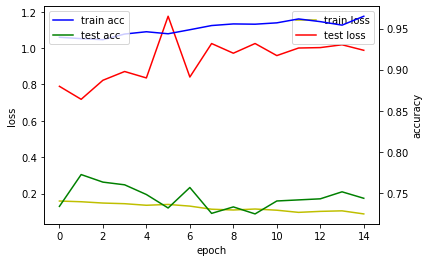

In [58]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# Submission

In [79]:
test_pad = get_pad(test_text)

Found 9844 unique tokens
Shape of text tensor: (3263, 22)


## GRU Model with additional layer and 32 neurons

In [80]:
preds = model1.predict(test_pad)

In [81]:
predictions = np.where(preds >= 0.9,1,0)

In [82]:
test_id = test.id

In [83]:
output = pd.DataFrame({'id':test_id,'target':list(predictions)})
output['target'] = output['target'].str.get(0)
output.head()

,id,target
0,0,1
1,2,0
2,3,0
3,9,0
4,11,0


In [85]:
output.to_csv('MSDS_422_Assignment_8_GRU_3L_32N.csv', sep=',', encoding='utf-8', index=False)

## LSTM Modle

In [99]:
preds = model2.predict(test_pad)

In [100]:
predictions = np.where(preds >= 0.9,1,0)

In [101]:
test_id = test.id

In [102]:
output = pd.DataFrame({'id':test_id,'target':list(predictions)})
output['target'] = output['target'].str.get(0)
output.head()

,id,target
0,0,1
1,2,0
2,3,0
3,9,0
4,11,0


In [103]:
output.to_csv('MSDS_422_Assignment_8_LTM.csv', sep=',', encoding='utf-8', index=False)

## GRU with additional layer and 128 neurons

In [104]:
preds = model1_2.predict(test_pad)

In [105]:
predictions = np.where(preds >= 0.9,1,0)

In [106]:
test_id = test.id

In [107]:
output = pd.DataFrame({'id':test_id,'target':list(predictions)})
output['target'] = output['target'].str.get(0)
output.head()

,id,target
0,0,1
1,2,0
2,3,0
3,9,0
4,11,0


In [108]:
output.to_csv('MSDS_422_Assignment_8_GRU_3L_128N.csv', sep=',', encoding='utf-8', index=False)

## GRU Model

In [109]:
preds = model.predict(test_pad)

In [110]:
predictions = np.where(preds >= 0.9,1,0)

In [111]:
test_id = test.id

In [112]:
output = pd.DataFrame({'id':test_id,'target':list(predictions)})
output['target'] = output['target'].str.get(0)
output.head()

,id,target
0,0,1
1,2,0
2,3,0
3,9,0
4,11,0


In [113]:
output.to_csv('MSDS_422_Assignment_8_GRU_2L_32N.csv', sep=',', encoding='utf-8', index=False)

## Submission Imgae

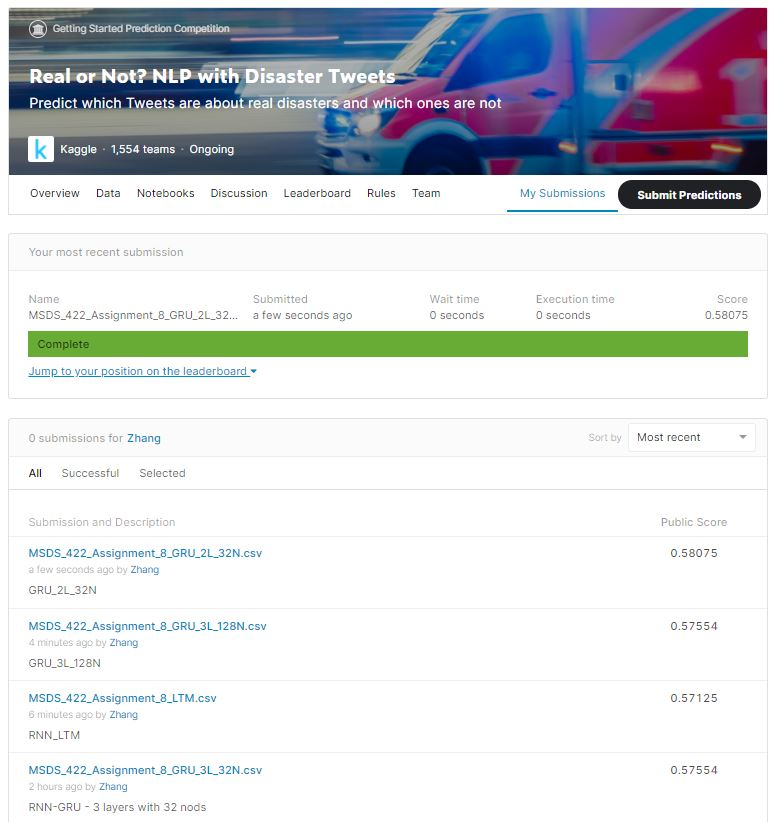

In [114]:
from IPython.display import Image
Image("Confirmation_Ass8.JPG")

# Mangement Queston

Before answering this question, let's identify what the difference between the LSTM and GRU. LSTM (Long Short Term Memory): LSTM has three gates (input, output and forget gate). GRU (Gated Recurring Units): GRU has two gates (reset and update gate).

GRU couples forget as well as input gates. GRU use less training parameters and memory, ex; therefore, GRU cute faster and train faster than LSTM. LSTM is more accurate on dataset using longer sequence comparing with GRU. 

Regarding to the management question, the management wants to identify the most critical customer message and have the customer support assigned to the customer to solve the issue. Based on this situation, we would recommed the GRU method. Since GRU is less memory consumption and fster opertion. However, if accuracy is more importation to management, we would recommed LSTM method, since it is more accurate but time consuming.

# Reference

Real or Not? NLP with Disaster Tweets---Sentiment Classification Using RNN

https://davinaliang.github.io/files/disaster_tweets/disaster.html